<a href="https://colab.research.google.com/github/mababil/Heart-Disease/blob/main/SC61207_MuhamamdAbabil_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Question

1. Data Preparation
Peserta dapat memilih dataset yang telah disediakan. Siapkan data berdasarkan langkah berikut:


*   Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.
*   Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.
*   Outlier: Memeriksa outlier dan menangani outlier jika ada.
*   Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
*   Feature encoding: Melakukan feature encoding jika diperlukan.

2. Exploratory Data Analysis (EDA)
Menggunakan dataset yang sama, Peserta diminta untuk:


*   Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
*   Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
*   Menemukan dan mendeskripsikan statistical five summaries
*   Mendeskripsikan distribusi data

3. Feature Engineering
Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

# Summary

*   age
*   sex
*   chest pain type (4values)
    * Value 0 : Typical angina
    * Value 1 : Atypical angina
    * Value 2 : Non-anginal pain
    * Value 3 : Asymptomatic

*   trestbps : resting blood pressure (in mm Hg on admission to the hospital)
*   chol : serum cholestoral in mg/dl
*   fbs:(fasting blood sugar > 120 mg/dl)(1=true; 0=false)
*   restecg: resting electrocadiographic results
    * Value 0 : Normal
    * Value 1 : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
    * Value 2 : showing probable  or definite left ventricular hyperthropy by Estes' criteria
    
*   thalach: maximum heart rate achieved
*   exang: exercise induced angina(1 = yes; 0=no)
*   oldpeak = ST depression induced by exercise relative to rest
*   slope : the slope of the peak exercise ST segment
    * Value 1 : upsloping
    * Value 2 : flat
    * Value 3 : downsloping

*   ca: number of major vessels (0-3) colored by flourosopy
*   thal : 3=normal; 6= fixeddefect; 7= reversable defect
*   target: 0=less chance of heart attack, 1=more chance of heart attack



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from google.colab import drive

#drive.mount('/content/drive')

df = pd.read_csv("/content/sample_data/heart.csv")

In [ ]:
#path = '/content/drive/MyDrive/Startup Campus/Assignment Chapter 2  - Data Preprocessing/heart.csv'
#@title Load Data
df = pd.read_csv('https://raw.githubusercontent.com/mababil/Heart-Disease/main/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

# Data Preparation









In [ ]:
#@title melihat missing value
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang dalam setiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Tidak ada missing value dari dataset ini

## Duplikat Value : mencari duplicate value dan menyelesaikannya jika ada

In [ ]:
#melihat data duplikat ada atau tidak
df_dup = df.duplicated().any()
print(df_dup)

True


In [ ]:
#jumlah data yang duplikat
df.duplicated().sum()

723

terdapat 723 data yang duplicate pada dataset tersebut

In [ ]:
#menghapus data yang duplicate
df = df.drop_duplicates()
df.duplicated().sum()

0

sudah tidak ada data yang duplicate

## Outlier : memeriksa outlier dan menangani outlier jika ada

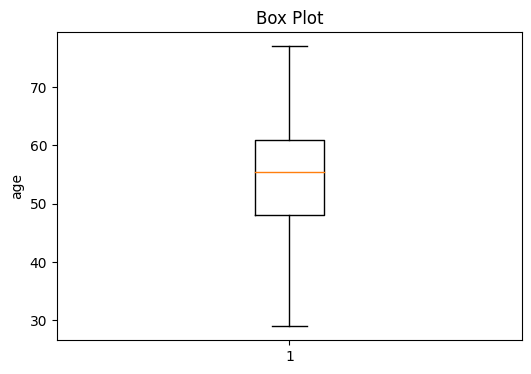

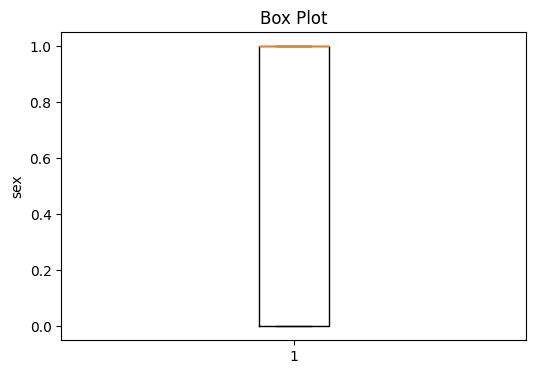

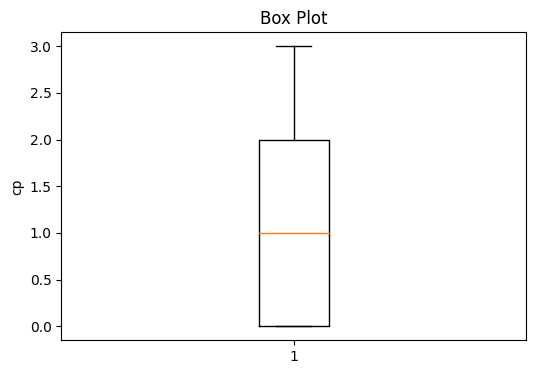

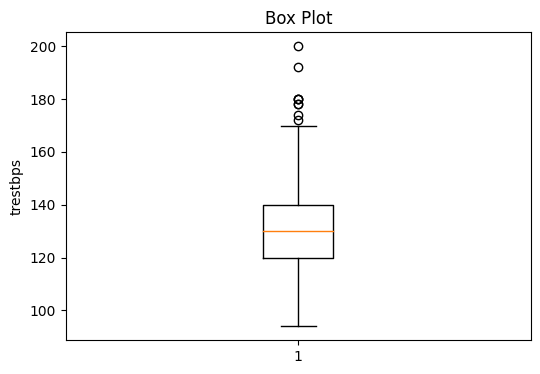

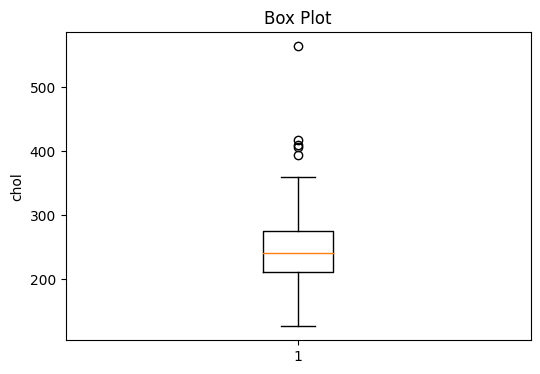

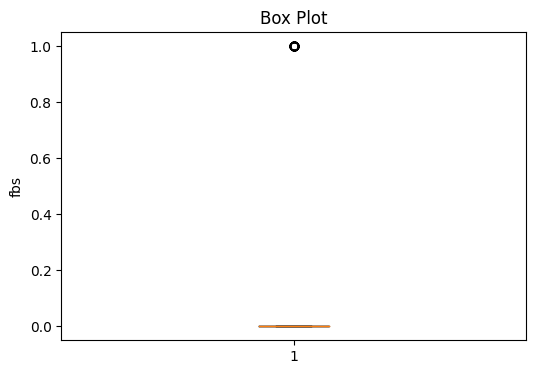

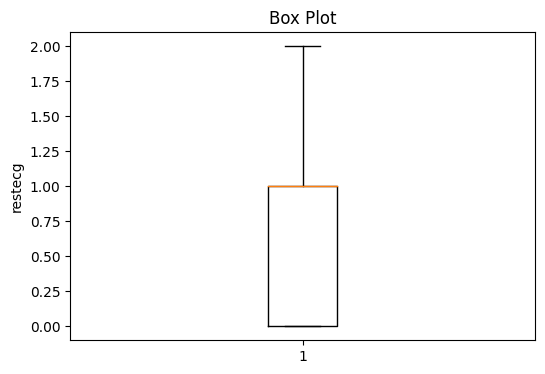

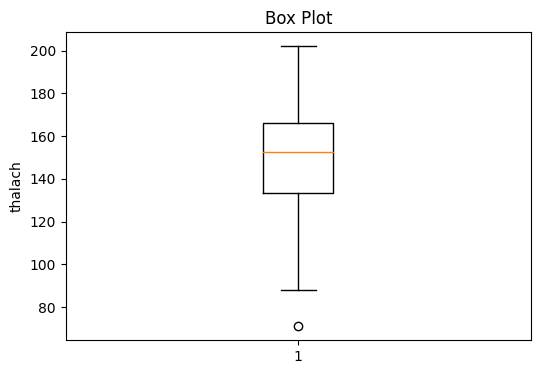

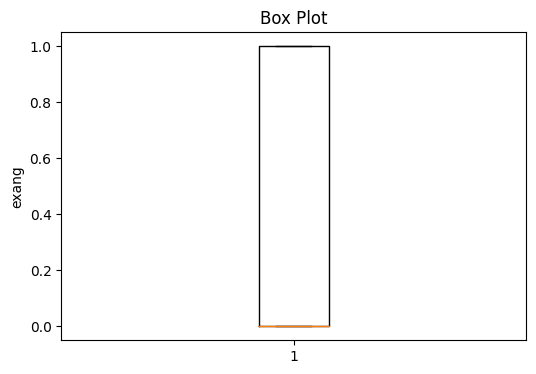

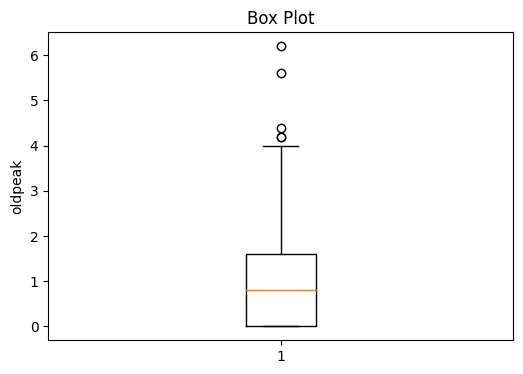

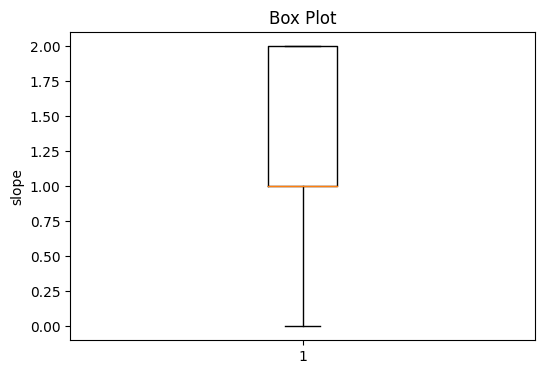

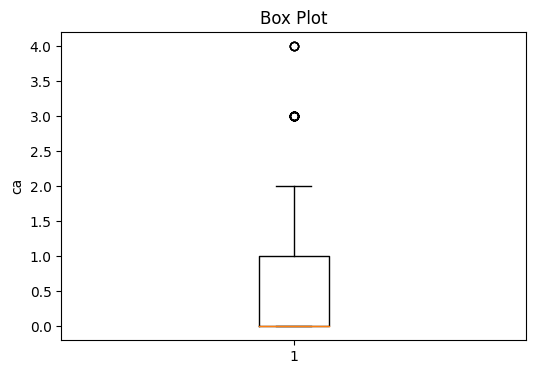

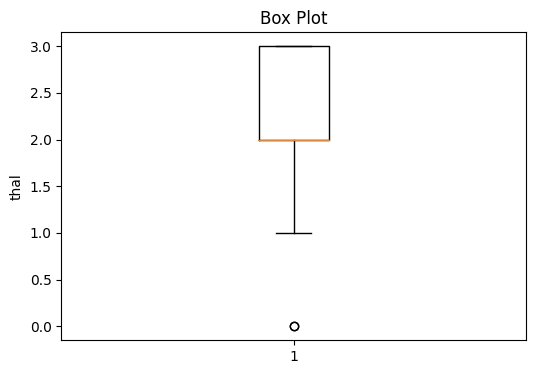

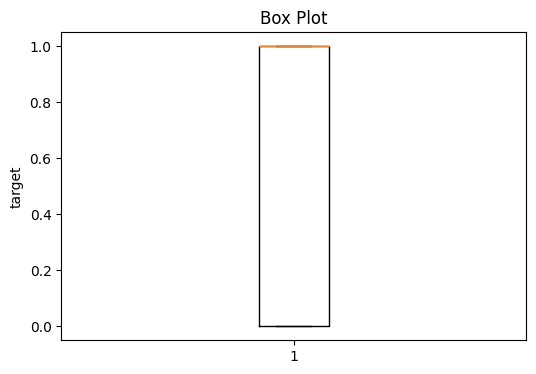

In [ ]:
#@title melihat data outlier
# Membuat box plot
plt.figure(figsize=(6,4))
plt.boxplot(df['age'])
plt.title('Box Plot')
plt.ylabel('age')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['sex'])
plt.title('Box Plot')
plt.ylabel('sex')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['cp'])
plt.title('Box Plot')
plt.ylabel('cp')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['trestbps'])
plt.title('Box Plot')
plt.ylabel('trestbps')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['chol'])
plt.title('Box Plot')
plt.ylabel('chol')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['fbs'])
plt.title('Box Plot')
plt.ylabel('fbs')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['restecg'])
plt.title('Box Plot')
plt.ylabel('restecg')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['thalach'])
plt.title('Box Plot')
plt.ylabel('thalach')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['exang'])
plt.title('Box Plot')
plt.ylabel('exang')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['oldpeak'])
plt.title('Box Plot')
plt.ylabel('oldpeak')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['slope'])
plt.title('Box Plot')
plt.ylabel('slope')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['ca'])
plt.title('Box Plot')
plt.ylabel('ca')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['thal'])
plt.title('Box Plot')
plt.ylabel('thal')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['target'])
plt.title('Box Plot')
plt.ylabel('target')
plt.show()

dari dataset diatas memang masih ada beberapa outlier akan tetapi disini casenya outlier yang sehat jadi tidak perlu dihapus karna tidak akan menggangu distribusi data.

# Exploratory Data Analysis (EDA)

## Part 1 Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

Pada bagian ini kita akan memahami karakteristik dari masing-masing variabel yang ada. Dengan memahami fitur-fitur tersebut, kita data dapat mengidentifikasi informasi yang penting untuk diambil.

<Axes: >

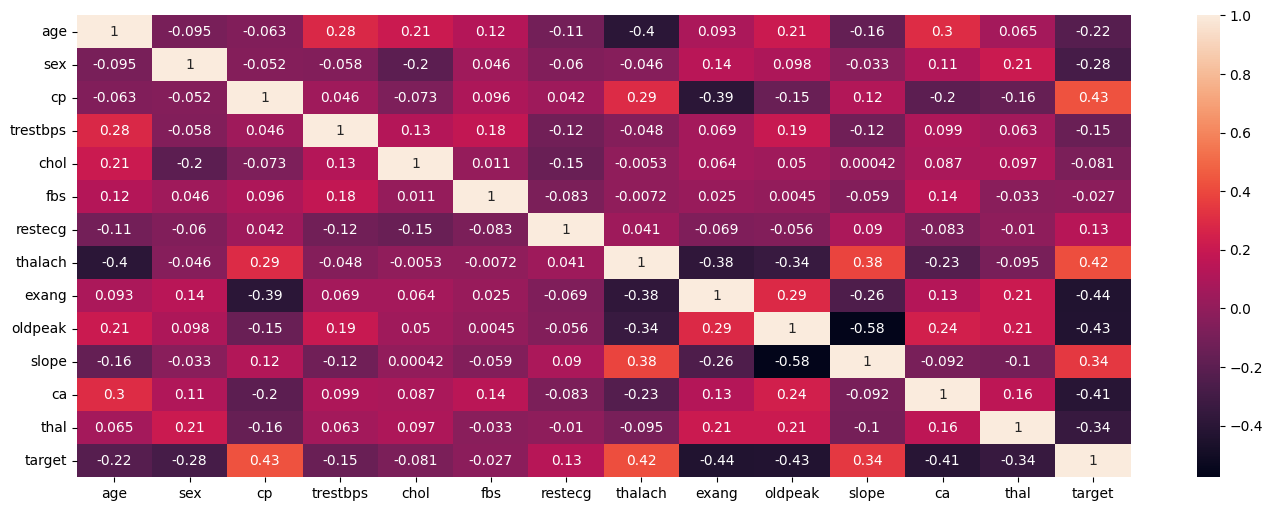

In [ ]:
#@title corelation matrix
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(), annot=True)

Analisa : Tujuan dari Corelation Matriks ini untuk membantu kita melihat dan memahami seberapa kuat atau lemah hubungan antara variabel-variabel yang ada dalam dataset ini.

In [ ]:
#@title Berapa banyak orang yang kena penyakit jantung, dan berapa banyak orang yang tidak kena penyakit jantung pada dataset ini ?
df['target'].value_counts()
#1 kena penyakit jantung
#0 tidak kena penyakit jantung

1    164
0    138
Name: target, dtype: int64

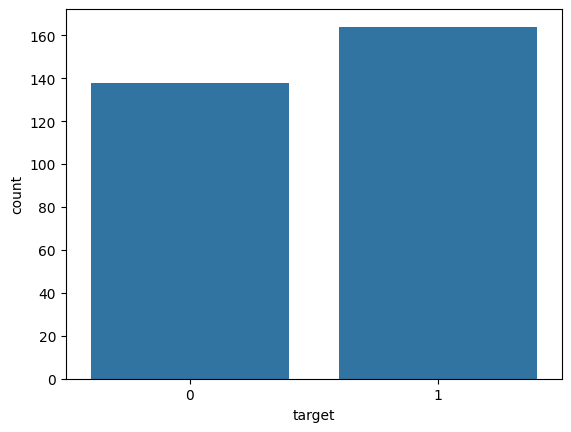

In [ ]:
sns.countplot(data=df, x="target")
plt.show()

In [ ]:
#@title Berapa banyak pria & wanita dalam dataset ini?
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

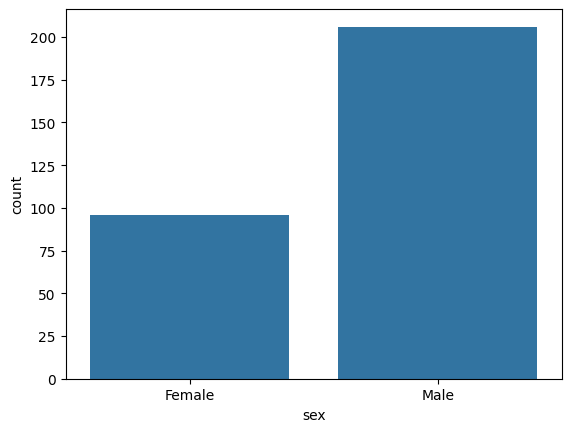

In [ ]:
sns.countplot(data=df, x="sex")
plt.xticks([0,1], ['Female','Male'])
plt.show()

Analisa : Berdasarkan dataset ini dapat kita liat banyak kolom yang berisikan informasi yang cukup jarang banyak orang awam tau mengenai istilah medis yang ada. Oleh karna itu diatas saya ambil beberapa contoh informasi penting yang mudah dimengerti yaitu jumlah target yang terkena heart disease dan tidak kena lalu gender yang ada pada data ini.

# Numeric VS Target
Pada tahap ini kita akan melihat informasi yang ada berdasarkan tipe datanya yang numerical, pada case ini saya akan mengambil contoh kolom age

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<ipython-input-195-59f0328116e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age[df.target == 0], bins=[0, 5, 12, 18, 40, 60, 100], color="g", label="not heart disease")
<ipython-input-195-59f0328116e0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age[df.target == 1], bins=[0, 5, 

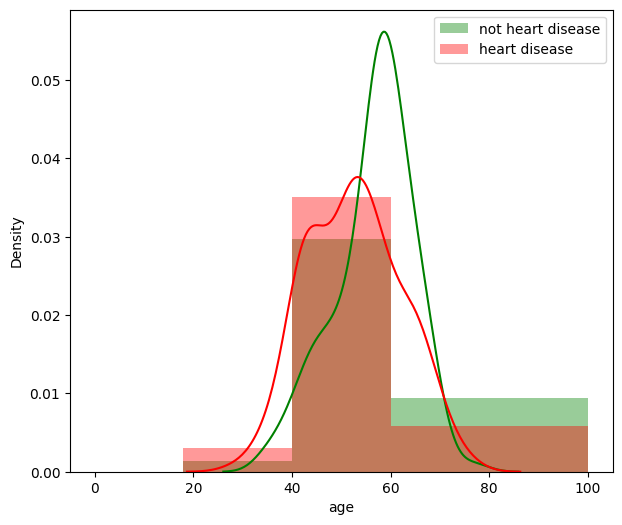

In [ ]:
plt.figure(figsize=(7, 6))
sns.distplot(df.age[df.target == 0], bins=[0, 5, 12, 18, 40, 60, 100], color="g", label="not heart disease")
sns.distplot(df.age[df.target == 1], bins=[0, 5, 12, 18, 40, 60, 100], color="r", label="heart disease")
plt.legend()

dari tampilan diatas dapat kita liat usia yang cukuo tinggi terkena heart disease adalah rentang 40-55, sedang kan ketika sudah memasuki usia 60an justu tinggi untuk tidak terkena heart disease

#  Nominal / Ordinal vs Target

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


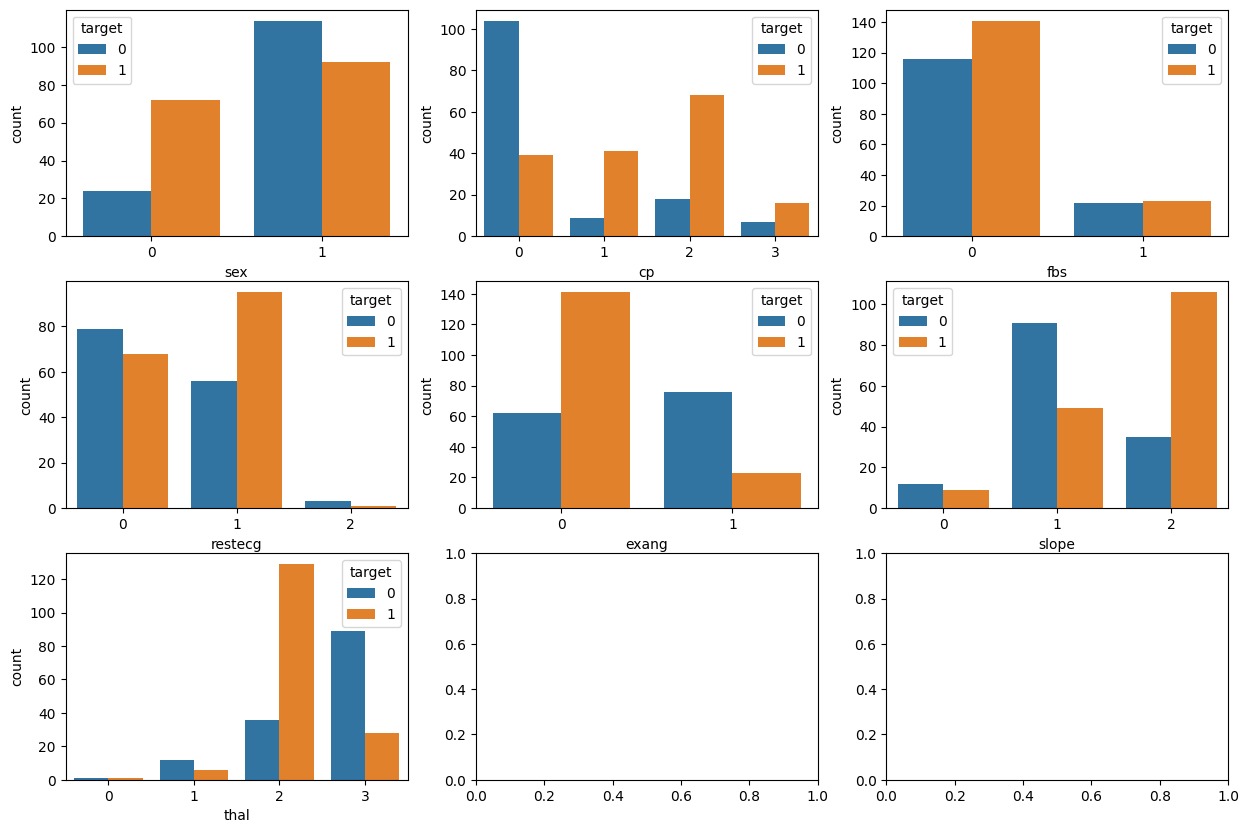

In [ ]:
cat_var = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for cat, ax in zip(cat_var, axes.flatten()):
  sns.countplot(x=cat, data=df, hue="target", ax=ax)

dari tampilan diatas kita dapat melihat distribusi data yang ada dari besarnya tingkat yang terkena heart disease (ditandai 1) dan yang tidak (ditandai 0). data ini memanfaatkan kolom 'target' dan masing masing kolom nominal/categorical lainya.

### Part 2 Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### median
 Mean, Mean adalah nilai rata rata yang ada dalam sautu dataset. seperti pada perintah diatas menambahkan semua nilai dalam kumpulan data dan kemudian membaginya dengan jumlah total nilai dalam kumpulan data tersebut.

In [ ]:
mean = df.mean()
mean

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

Kapan Mean itu digunakan bagusnya ? Mean lebih baik digunakan sebagai ukuran pemusatan data, jika data berdistribusi normal.

### median
Median, adalah nilai tengah dalam sebuah kumpulan data yang diurutkan. Untuk menemukan median, kita dapat mengurutkan semua nilai dalam kumpulan data dari yang terkecil hingga yang terbesar, lalu menemukan nilai tengah.

In [ ]:
median = df.median()
median

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Kapan Median itu digunakan bagusnya ? Median lebih baik digunakan sebagai ukuran pemusatan data, jika data mengandung outlier (nilai nilai yang jauh berbeda jika dibandingkan dengan data lainya). selain itu mendian juga bagus digunakan pada data yang open ended distribution yaitu frekuensi ayng tidak memiliki nilai awal dan akhir yang spesifik.

### Modus, adalah nilai yang paling sering muncul dalam sebuah kumpulan data.Dengan kata lain, modus adalah nilai yang memiliki frekuensi tertinggi.

In [ ]:
modus = df.mode()
modus

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kapan Modus itu digunakan bagusnya ?  Modus lebih baik digunakan sebagai pengukuran pemusatan data untuk data nominal atau categorical dan menginginkan pengambaran data yang paling umum.

## Part 3 Menemukan dan mendeskripsikan statistical five summaries

Statistical five-number summary adalah ringkasan statistik yang menggambarkan distribusi data dengan lima angka: minimum, kuartil bawah (Q1), median (Q2), kuartil atas (Q3), dan maksimum. Ini memberikan gambaran yang komprehensif tentang bagaimana data tersebar, tanpa harus melihat keseluruhan distribusi. Berikut adalah deskripsi singkat tentang masing-masing komponen:


*   Minimum: Nilai terkecil dalam dataset. Ini adalah nilai paling rendah yang bisa dicapai oleh data.
*   Kuartil Bawah (Q1): Nilai yang membagi 25% data terendah dari 75% sisanya. Dalam kata lain, 25% dari data memiliki nilai di bawah kuartil bawah.
*   Median (Q2): Nilai tengah dalam dataset ketika data diurutkan dari yang terkecil hingga yang terbesar. Secara intuitif, ini adalah nilai yang membagi data menjadi dua bagian yang sama besar.
*   Kuartil Atas (Q3): Nilai yang membagi 75% data terendah dari 25% sisanya. Dalam kata lain, 75% dari data memiliki nilai di bawah kuartil atas.
*   Maksimum: Nilai terbesar dalam dataset. Ini adalah nilai paling tinggi yang bisa dicapai oleh data.










Statistical five-number summary sangat berguna untuk memberikan gambaran singkat tentang sebaran data, khususnya ketika berurusan dengan dataset yang besar. Ini juga membantu dalam mengidentifikasi adanya outlier dan menyajikan informasi yang berguna dalam pemahaman tentang pusat dan persebaran data.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Part 4 Distribusi Data

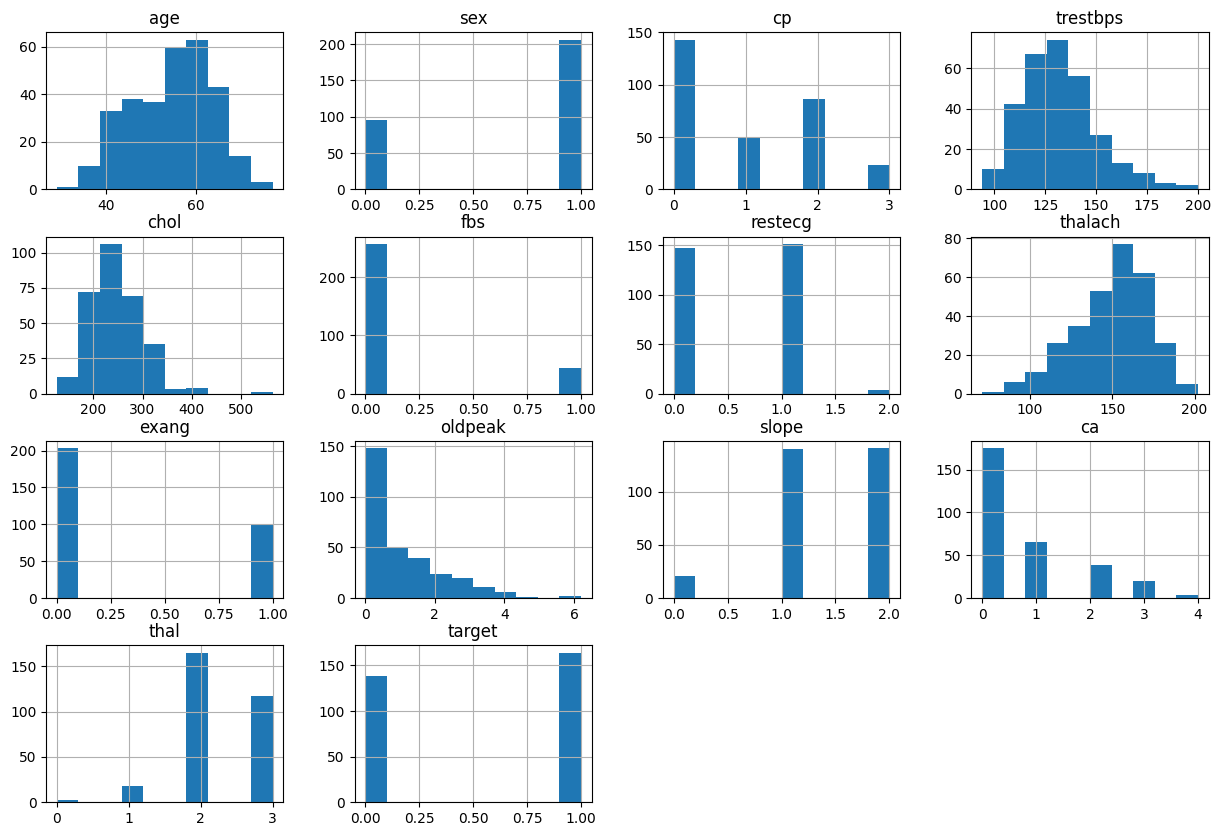

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10))
plt.show()

Dari distribusi data diatas dapat diliat semua kolom yang ada pada dataset ini, untuk distribusinya :

*   age = untuk age memiliki range data usia dari sekitar usia 20 hingga 80, dimana umur terbanyak itu berada dirange 60
*   sex = untuk sex hanya memiliki 2 yaitu pria dan wanita dimana populasi pria lebih banyak sekitar 200 lebih, sedangkan wanita hanya tidak sampai setengahnya pria
*   cp = untuk Cp memilki distribusi yg beragam dimana kondisi tertinggi itu dipegang oleh 0 (typical angina) sedangkan 3 yang lainya berada dibawah tidak melebihi 100
*   trestbps = untuk trestbps memiliki range nilai sekitar 50-200 dan memiliki lonjakan tertinggi pada angka sekitar 125-140
*   chol =  untuk chol memiliki distirbusi mulai dari range sekitar 20-500 lebih dimana puncak nilai tertinggi berada pada nilai sekitar 250
*   fbs = untuk fbs hanya memiliki 2 kategori yaitu 1 untuk fbs > 120 dan 0 jika tidak, dimaan nilai untuk 1 itu lebih tinggi sekitar 250 sedangkan untuk 0 tidak sampai setengahnya
*   restecg = untuk restech juga memiliki 3 kategori disini untuk kondisi 0 & 1 cukup dominan hanya berbeda sekitar 5 angka sedangkan kondisi 2 sangat minim tidak lebih dari 10
*   thalach = untuk thalach terbilang nilai yang cukup statistical dari bentuknya seperti tangga dimana nilai terbesar mencapai 200, dimana lonjakan terbanyak ada pada nilai sekitar 150
*   exang = untuk exang memiliki 2 kondisi yaitu kondisi 1 dan 0, dimana nilai 0 jauh lebih tinggi dari 1 mencapai sekitar 200 sedangkan nilai 1 hanya setengahnya
*   oldpeak = untuk oldpeak memiliki range data dari 0-6, dimana lonjakan nilai berada pada nilai 0 seterusnya cendrung menurun bahkan drastis dari nilai 0
*   slope = slope memiliki 3 pembagian nilai 0,1,2 , dimana untuk nilai 0 sangat minim tidak melebihi 50 sedangkan 1 dan 2 rentang data yang sama sekitar mendekati 200
*   ca = untuk ca memiliki data dimana berada pada range 50 0 hingga 4, dimana distribusi anak tangga ini dimulai dari nilai 0 mengalami lonjakan yang tinggi mencaopai sekitar 155 dan seterusnya cendrung menurun dan semakin menurun hingga nilai 4
*   thal = untuk thal juga memiliki 4 nilai dimulai dari 0 hingga 4, dimana  0 dan 1 memiliki nilai tidak lebih dari 25 sedangkan 2 dan 3 melebihi 100 dan nilai tertinggi ada pada 2 mencapai 150 kebih
*   target = untuk target juga diabgi menjadi 2 kategori yaitu heart disease dan not, dimana jumlah heart disease lebih banyak sedikit dibanding yang tidak kena yaitu mencapai 150 lebih sedangkan yang not hanya berada pada range sekitar 146-148




# Feature Engineering

# 1. Rata rata tekanan darah

 Ini adalah metrik yang untuk memberikan perkiraan tekanan darah rata-rata berdasarkan dua atribut 'trestbps' (Tekanan Darah Istirahat) dan 'oldpeak'. dengan 'mbp' dapat memberikan gambaran tekanan darah yang dihasilkan oleh kombinasi tekanan darah istirahat dan perubahan tekanan selama aktivitas fisik.

In [ ]:
#membuat fitur mbp
df['mbp'] = (df['trestbps'] + df['oldpeak'])/2
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,mbp
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,63.00
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,71.55
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,73.80
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,74.00
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,69.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,60.75
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,54.30
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,64.00
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,80.00


# 2. Riwayat Merokok (Smoking History)

In [ ]:
#menambah fitur smoking_hist
df['smoking_hist']= ((df['age']> 45) & (df['sex']==1) & (df['fbs']==1) ).astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,mbp,smoking_hist
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,63.00,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,71.55,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,73.80,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,74.00,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,69.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,60.75,0
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,54.30,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,64.00,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,80.00,0


## 3 Aktifitas fisik (Physical activity)
Mencerminkan tingkat aktifitas pasien ayng dapat mengindikasikan faktor faktor yang mempengaruhi resiko penyakit jantung dan membantu dalam analisis resiko dan pencegahan

In [ ]:
#menambah fitur physical activity
df['physical_act']= df['exang'] * df['slope']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,mbp,smoking_hist,physical_act
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,63.00,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,71.55,1,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,73.80,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,74.00,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,69.95,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,60.75,0,0
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,54.30,0,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,64.00,0,2
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,80.00,0,0


# 4. Total kolestrol

kolestrol total dapat memberikan gambaran lebih lengkap tentang profil lipid seseorang dan dapat menjadi faktor resiko dalam pengembangan penyakit jantung

In [ ]:
#menambah fitur total kolesterol
df['total_chol'] = df['chol'] + df['thalach']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,mbp,smoking_hist,physical_act,total_chol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,63.00,0,0,380
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,71.55,1,0,358
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,73.80,0,0,299
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,74.00,0,0,364
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,69.95,0,0,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,60.75,0,0,326
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,54.30,0,0,316
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,64.00,0,2,416
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,80.00,0,0,398


# 5. Kadar kolestrol standar (normal cholesterol)
menggabungkan data dari kolom chol (kolesterol) dan sex (jenis kelamin) uuntuk menentukan apakah kadar kolestrol pasien berada dalam rentang normal, hasilnya bernilai 1 jika kadar kolestrol normal, dan 0 jika tidak

In [ ]:
#rentang normal kolestrol
normal_cholesterol_range =(200, 240)

#membuat fitur normal_chol (kadar kolesterol normal)
df['normal_chol'] = df ['chol'].between(normal_cholesterol_range[0], normal_cholesterol_range[1]).astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,mbp,smoking_hist,physical_act,total_chol,normal_chol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,63.00,0,0,380,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,71.55,1,0,358,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,73.80,0,0,299,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,74.00,0,0,364,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,69.95,0,0,400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,60.75,0,0,326,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,54.30,0,0,316,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,64.00,0,2,416,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,80.00,0,0,398,0


# 6 tekanan darah normal (normal blood presure)
menggabungkan data dari kolom 'trestbps' (tekanan darah istirahat) dan 'sex' (jenis kelamin) untuk menentukan apakah tekanan darah pasien berada dalam rentang normal. Hasilnya bernilai 1 jika kadar nbp seseorang berada dalam rentang normal. dan 0 jika tidak

In [ ]:
#rentang normal kolestrol
normal_blood_pressure_range =(90, 120)

#membuat fitur nbp (normal blood pressure)
df['nbp'] = df ['trestbps'].between(normal_blood_pressure_range[0], normal_blood_pressure_range[1]).astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,mbp,smoking_hist,physical_act,total_chol,normal_chol,nbp
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,63.00,0,0,380,1,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,71.55,1,0,358,1,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,73.80,0,0,299,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,74.00,0,0,364,1,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,69.95,0,0,400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,60.75,0,0,326,1,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,54.30,0,0,316,0,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,64.00,0,2,416,0,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,80.00,0,0,398,0,0


# 7. Tingkat Stress (stress level)
Menunjukkan tingkat stress pasien. dalam hal ini memanfaatkan informasi dari nilai kolom 'restecg' (pola jantung saat istirahat), 'smoking_hist' (riwayat merokok), 'trestbps' (tekanan darah), 'thalach' (detak jantung maksimum). semakin banyak faktor yang terpenuhi, dan semakin tinggi tingkat stres yang dialami oleh individu tersebut. Hasilnya jika 0 tidak stress, jika 1 maka berpotensi stres, dan jika >1 maka berpotensi stress tinggi


In [ ]:
#membuat fitur stress level
df['stress_lvl'] = (df['restecg'] !=0).astype(int) + df['smoking_hist'] + (df['trestbps'] >140).astype(int)+ (df['thalach'] <100).astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,mbp,smoking_hist,physical_act,total_chol,normal_chol,nbp,stress_lvl
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,63.00,0,0,380,1,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,71.55,1,0,358,1,0,1
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,73.80,0,0,299,0,0,2
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,0,74.00,0,0,364,1,0,2
4,62,0,0,138,294,1,1,106,0,1.9,...,3,2,0,69.95,0,0,400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,0,2,1,60.75,0,0,326,1,1,0
733,44,0,2,108,141,0,1,175,0,0.6,...,0,2,1,54.30,0,0,316,0,1,1
739,52,1,0,128,255,0,1,161,1,0.0,...,1,3,0,64.00,0,2,416,0,0,1
843,59,1,3,160,273,0,0,125,0,0.0,...,0,2,0,80.00,0,0,398,0,0,1


# 8.  Family History (Riwayat Keluarga)
Menunjukkan riwayat keluarga dengan memanfaatkan dari kedua kolom 'ca' dan 'thal' untuk membuat fitur 'family_hist'. Dalam hal ini apabila Fitur 'family_hist' akan memiliki nilai 1 jika salah satu kondisi atau keduanya terpenuhi dan dianggap memiliki riwayat jantung dikeluarga, dan 0 jika tidak ada kondisi yang terpenuhi(tidak ada riwayat jantung dalam kelaurga).

In [ ]:

# Membuat fitur baru 'family_hist' berdasarkan kondisi dari kolom 'ca' dan 'thal'
df['family_his'] = ((df['ca'] > 1) | ((df['thal'] == 'fixed defect') | (df['thal'] == 'reversible defect'))).astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,mbp,smoking_hist,physical_act,total_chol,normal_chol,nbp,stress_lvl,family_his
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,63.00,0,0,380,1,0,1,1
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,71.55,1,0,358,1,0,1,0
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,73.80,0,0,299,0,0,2,0
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,74.00,0,0,364,1,0,2,0
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,69.95,0,0,400,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,2,1,60.75,0,0,326,1,1,0,0
733,44,0,2,108,141,0,1,175,0,0.6,...,2,1,54.30,0,0,316,0,1,1,0
739,52,1,0,128,255,0,1,161,1,0.0,...,3,0,64.00,0,2,416,0,0,1,0
843,59,1,3,160,273,0,0,125,0,0.0,...,2,0,80.00,0,0,398,0,0,1,0


# 9. Hipertensi History (Riwayat Hipertensi)

 Menunjukkan riwayat hipertensi dengan memanfaatkan dari kedua kolom 'trestbps' dan 'thalach' untuk membuat fitur 'Hipertensi_Hist'. jika tekanan darah sistolik (trestbps) atau diastolik (thalach) berada di atas ambang batas tertentu. maka jika nilai 'Hipertensi_Hist' adalah 1 dianggap memiliki riwayat hipertensi. jika 0 maka tidak.

In [ ]:
# Ambang batas untuk tekanan darah sistolik dan diastolik yang menunjukkan hipertensi
sistolik_threshold = 140
diastolik_threshold = 90

# Membuat fitur baru 'hypertension_history' berdasarkan tekanan darah sistolik dan diastolik
df['hipertensi_hist'] = ((df['trestbps'] > sistolik_threshold) | (df['thalach'] > diastolik_threshold)).astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,mbp,smoking_hist,physical_act,total_chol,normal_chol,nbp,stress_lvl,family_his,hipertensi_hist
0,52,1,0,125,212,0,1,168,0,1.0,...,0,63.00,0,0,380,1,0,1,1,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,71.55,1,0,358,1,0,1,0,1
2,70,1,0,145,174,0,1,125,1,2.6,...,0,73.80,0,0,299,0,0,2,0,1
3,61,1,0,148,203,0,1,161,0,0.0,...,0,74.00,0,0,364,1,0,2,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,69.95,0,0,400,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,1,60.75,0,0,326,1,1,0,0,1
733,44,0,2,108,141,0,1,175,0,0.6,...,1,54.30,0,0,316,0,1,1,0,1
739,52,1,0,128,255,0,1,161,1,0.0,...,0,64.00,0,2,416,0,0,1,0,1
843,59,1,3,160,273,0,0,125,0,0.0,...,0,80.00,0,0,398,0,0,1,0,1


# 10 Binning kolom age
Pada tahap ini akan melakukan bining pada data numeric pada kolom age yang mana pada sebelumnya umur itu didefinisikan dengan rentang angka, pada tahap ini saya mau membuat fitur baru dengan mengubah nilainya menjadi teks sehingga lebih terstruktur dan mudah mengkategorikannya

In [ ]:
#melakukan binning pada kolom age
df.age = pd.cut(df.age,[0, 5, 12, 18, 40, 60, 100], labels=["balita","anak anak", "remaja", "dewasa", "lansia muda", "lansia tua"])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,mbp,smoking_hist,physical_act,total_chol,normal_chol,nbp,stress_lvl,family_his,hipertensi_hist
0,lansia muda,1,0,125,212,0,1,168,0,1.0,...,0,63.00,0,0,380,1,0,1,1,1
1,lansia muda,1,0,140,203,1,0,155,1,3.1,...,0,71.55,1,0,358,1,0,1,0,1
2,lansia tua,1,0,145,174,0,1,125,1,2.6,...,0,73.80,0,0,299,0,0,2,0,1
3,lansia tua,1,0,148,203,0,1,161,0,0.0,...,0,74.00,0,0,364,1,0,2,0,1
4,lansia tua,0,0,138,294,1,1,106,0,1.9,...,0,69.95,0,0,400,0,0,1,1,1
